In [71]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install pprintpp

In [74]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [10]:
df = pd.read_csv("AEP_hourly.csv")

print("First 15 Rows ","\n")
print(df.head(15),"\n")
print("Last 15 Rows ","\n")
print(df.tail(15),"\n")



First 15 Rows  

               Datetime   AEP_MW
0   2004-12-31 01:00:00  13478.0
1   2004-12-31 02:00:00  12865.0
2   2004-12-31 03:00:00  12577.0
3   2004-12-31 04:00:00  12517.0
4   2004-12-31 05:00:00  12670.0
5   2004-12-31 06:00:00  13038.0
6   2004-12-31 07:00:00  13692.0
7   2004-12-31 08:00:00  14297.0
8   2004-12-31 09:00:00  14719.0
9   2004-12-31 10:00:00  14941.0
10  2004-12-31 11:00:00  15184.0
11  2004-12-31 12:00:00  15009.0
12  2004-12-31 13:00:00  14808.0
13  2004-12-31 14:00:00  14522.0
14  2004-12-31 15:00:00  14349.0 

Last 15 Rows  

                   Datetime   AEP_MW
121258  2018-01-01 10:00:00  19847.0
121259  2018-01-01 11:00:00  19710.0
121260  2018-01-01 12:00:00  19453.0
121261  2018-01-01 13:00:00  19049.0
121262  2018-01-01 14:00:00  18737.0
121263  2018-01-01 15:00:00  18619.0
121264  2018-01-01 16:00:00  18691.0
121265  2018-01-01 17:00:00  19109.0
121266  2018-01-01 18:00:00  20279.0
121267  2018-01-01 19:00:00  20925.0
121268  2018-01-01 20:00:00  2

In [11]:
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



## Step 2:
## Reformat the Date Time Columns¶

In [12]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(3)
print(dataset)

                      AEP_MW  Month  Year        Date      Time  Week      Day
Datetime                                                                      
2004-12-31 01:00:00  13478.0     12  2004  2004-12-31  01:00:00    53   Friday
2004-12-31 02:00:00  12865.0     12  2004  2004-12-31  02:00:00    53   Friday
2004-12-31 03:00:00  12577.0     12  2004  2004-12-31  03:00:00    53   Friday
2004-12-31 04:00:00  12517.0     12  2004  2004-12-31  04:00:00    53   Friday
2004-12-31 05:00:00  12670.0     12  2004  2004-12-31  05:00:00    53   Friday
...                      ...    ...   ...         ...       ...   ...      ...
2018-01-01 20:00:00  21089.0      1  2018  2018-01-01  20:00:00     1   Monday
2018-01-01 21:00:00  20999.0      1  2018  2018-01-01  21:00:00     1   Monday
2018-01-01 22:00:00  20820.0      1  2018  2018-01-01  22:00:00     1   Monday
2018-01-01 23:00:00  20415.0      1  2018  2018-01-01  23:00:00     1   Monday
2018-01-02 00:00:00  19993.0      1  2018  2018-01-0

In [13]:
print(test)

NameError: name 'test' is not defined

In [14]:
dataset["Week"]

Datetime
2004-12-31 01:00:00    53
2004-12-31 02:00:00    53
2004-12-31 03:00:00    53
2004-12-31 04:00:00    53
2004-12-31 05:00:00    53
                       ..
2018-01-01 20:00:00     1
2018-01-01 21:00:00     1
2018-01-01 22:00:00     1
2018-01-01 23:00:00     1
2018-01-02 00:00:00     1
Name: Week, Length: 121273, dtype: UInt32

## Step 3:

In [15]:
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")


[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



In [16]:
l=[]
for i in range(len(dataset)):
    l.append(dataset["Year"][i])
    
    #print(dataset["Year"][22898])
print(l)


[2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2005, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 200

In [17]:
la=[]
global la
for i in range(len(dataset)):
    la.append(dataset["AEP_MW"][i])
    
    
    #print(dataset["Year"][22898])
print(la)


[13478.0, 12865.0, 12577.0, 12517.0, 12670.0, 13038.0, 13692.0, 14297.0, 14719.0, 14941.0, 15184.0, 15009.0, 14808.0, 14522.0, 14349.0, 14107.0, 14410.0, 15174.0, 15261.0, 14774.0, 14363.0, 14045.0, 13478.0, 12892.0, 14097.0, 13667.0, 13451.0, 13379.0, 13506.0, 14121.0, 15066.0, 15771.0, 16047.0, 16245.0, 16377.0, 16138.0, 15886.0, 15503.0, 15206.0, 15049.0, 15161.0, 16085.0, 16508.0, 16306.0, 16223.0, 15931.0, 15207.0, 14316.0, 15223.0, 14731.0, 14503.0, 14432.0, 14531.0, 15087.0, 16018.0, 16968.0, 17149.0, 17261.0, 17194.0, 17011.0, 16749.0, 16546.0, 16403.0, 16161.0, 16380.0, 17330.0, 17738.0, 17468.0, 17093.0, 16736.0, 15984.0, 14900.0, 17580.0, 17158.0, 17002.0, 16923.0, 17191.0, 17908.0, 18944.0, 19752.0, 19882.0, 19544.0, 19309.0, 18756.0, 18201.0, 17666.0, 17203.0, 16935.0, 17207.0, 18349.0, 18815.0, 18599.0, 18480.0, 18135.0, 17112.0, 16047.0, 16718.0, 16150.0, 16090.0, 16223.0, 16652.0, 17317.0, 18384.0, 19366.0, 19772.0, 19792.0, 19697.0, 19193.0, 18640.0, 18066.0, 17692.0, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Energy Consumption According to Year')

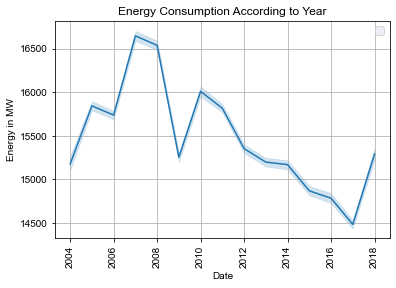

In [18]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

xx=[2,4,45,7,7,8,90]

sns.lineplot(x=l, y=la, data=df)
sns.set(rc={'figure.figsize':(15,6)})


#plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


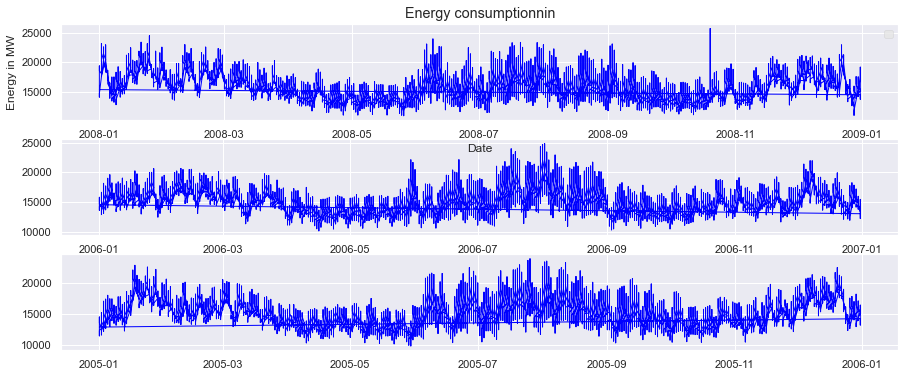

In [19]:
from matplotlib import style


fig = plt.figure()

#ax1= fig.add_subplot(311)
ax2= fig.add_subplot(313)
ax3= fig.add_subplot(312)
ax4= fig.add_subplot(311)


style.use('ggplot')

y_2004=dataset.loc["2004"]["AEP_MW"].to_list()
x_2004=dataset.loc["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="blue", linewidth=1)


y_2005=dataset.loc["2005"]["AEP_MW"].to_list()
x_2005=dataset.loc["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="blue", linewidth=1)


y_2006=dataset.loc["2006"]["AEP_MW"].to_list()
x_2006=dataset.loc["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="blue", linewidth=1)


y_2008=dataset.loc["2008"]["AEP_MW"].to_list()
x_2008=dataset.loc["2008"]["Date"].to_list()
ax4.plot(x_2008, y_2008, color="blue", linewidth=1)



plt.rcParams["figure.figsize"] = (30,9)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

## Energy Distribution

c:\users\p\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ennergy Distribution')

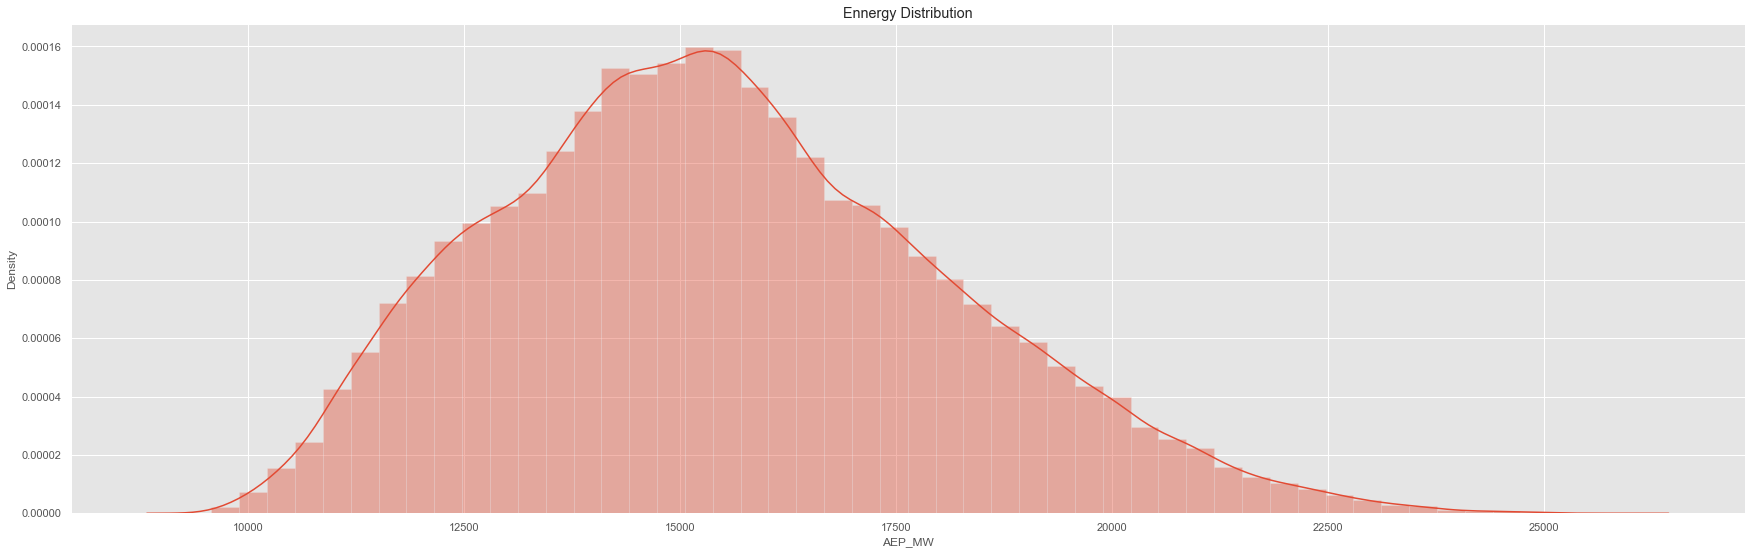

In [20]:
sns.distplot(dataset["AEP_MW"])
plt.title("Ennergy Distribution")

In [21]:
pd.plotting.register_matplotlib_converters()

## Energy with Respect to Time

In [22]:
print(dataset["Time"])

Datetime
2004-12-31 01:00:00    01:00:00
2004-12-31 02:00:00    02:00:00
2004-12-31 03:00:00    03:00:00
2004-12-31 04:00:00    04:00:00
2004-12-31 05:00:00    05:00:00
                         ...   
2018-01-01 20:00:00    20:00:00
2018-01-01 21:00:00    21:00:00
2018-01-01 22:00:00    22:00:00
2018-01-01 23:00:00    23:00:00
2018-01-02 00:00:00    00:00:00
Name: Time, Length: 121273, dtype: object


In [23]:
print(dataset["Time"][6])

07:00:00


In [24]:
tl=[]
for i in range(len(dataset)):
    tl.append(str(dataset["Time"][i]))
print(tl)

['01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


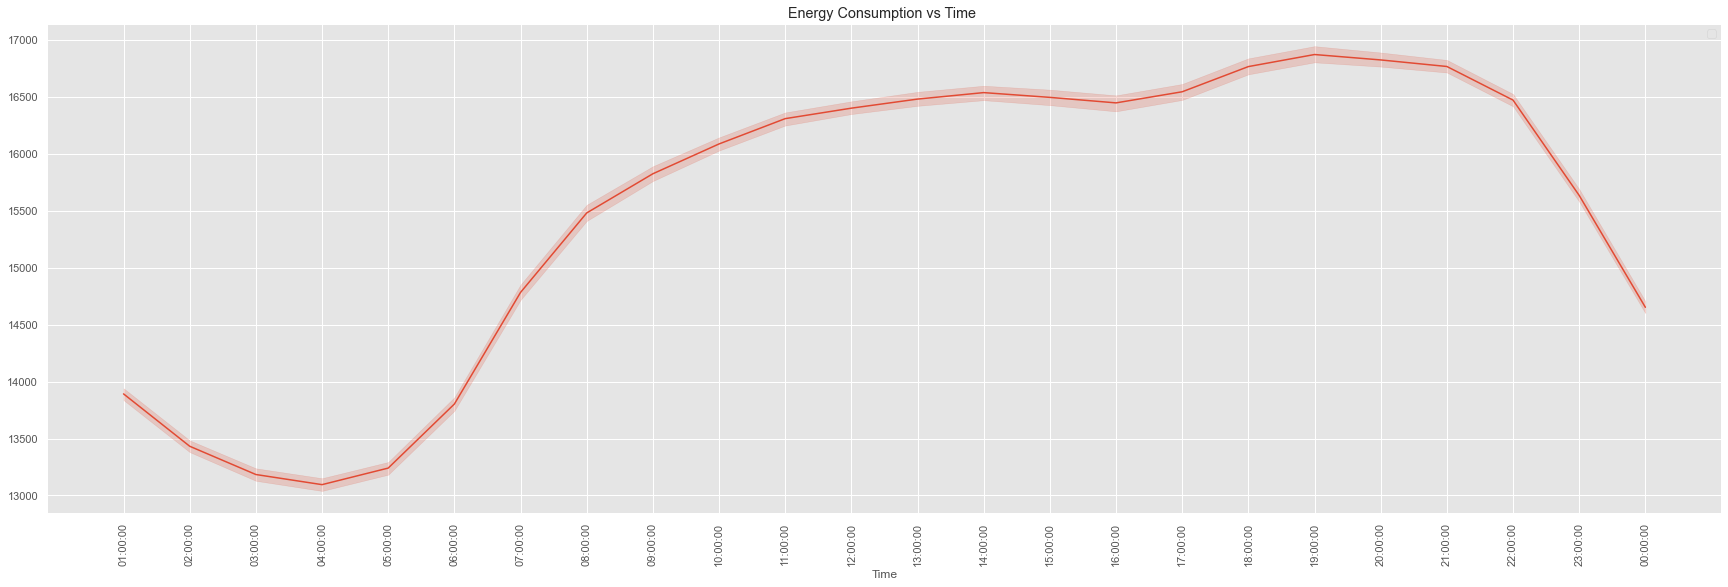

In [25]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=tl,y=la, data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

## Resampleing Data

In [26]:
NewDataSet = dataset.resample('D').mean()

In [27]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


In [28]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [29]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [30]:
type(Training_Set.values)

numpy.ndarray

In [31]:
Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [32]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


## Model

In [33]:
pip install keras

^C
Note: you may need to restart the kernel to use updated packages.


In [37]:
from keras.models import Sequential

In [38]:
from keras.layers import Dense,LSTM
from tensorflow.keras.layers import Dense, Dropout

In [39]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 150))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 2))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [51]:
regressor.fit(X_Train, Y_Train, epochs = 20, batch_size = 32)

Epoch 1/20
155/155 [==============================] - 78s 434ms/step - loss: 0.0251
Epoch 2/20
155/155 [==============================] - 69s 447ms/step - loss: 0.0178
Epoch 3/20
155/155 [==============================] - 78s 506ms/step - loss: 0.0161
Epoch 4/20
155/155 [==============================] - 82s 527ms/step - loss: 0.0155
Epoch 5/20
155/155 [==============================] - 71s 459ms/step - loss: 0.0153
Epoch 6/20
155/155 [==============================] - 70s 452ms/step - loss: 0.0130
Epoch 7/20
155/155 [==============================] - 69s 446ms/step - loss: 0.0096
Epoch 8/20
155/155 [==============================] - 69s 444ms/step - loss: 0.0088
Epoch 9/20
155/155 [==============================] - 72s 466ms/step - loss: 0.0079
Epoch 10/20
155/155 [==============================] - 82s 532ms/step - loss: 0.0079
Epoch 11/20
155/155 [==============================] - 84s 542ms/step - loss: 0.0076
Epoch 12/20
155/155 [==============================] - 87s 560ms/step - lo

## Test Data

In [40]:
TestData.head(32)

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0
2018-04-28,12237.583333,4.0,2018.0,17.0
2018-04-29,12156.791667,4.0,2018.0,17.0
2018-04-30,13443.500000,4.0,2018.0,18.0
2018-05-01,13251.875000,5.0,2018.0,18.0
2018-05-02,13641.166667,5.0,2018.0,18.0
2018-05-03,14217.250000,5.0,2018.0,18.0
2018-05-04,13725.625000,5.0,2018.0,18.0


In [41]:
TestData.shape

(100, 4)

In [42]:
print(TestData)

                  AEP_MW  Month    Year  Week
Datetime                                     
2018-04-26  13157.791667    4.0  2018.0  17.0
2018-04-27  12964.000000    4.0  2018.0  17.0
2018-04-28  12237.583333    4.0  2018.0  17.0
2018-04-29  12156.791667    4.0  2018.0  17.0
2018-04-30  13443.500000    4.0  2018.0  18.0
...                  ...    ...     ...   ...
2018-07-30  15368.083333    7.0  2018.0  31.0
2018-07-31  15180.291667    7.0  2018.0  31.0
2018-08-01  15151.166667    8.0  2018.0  31.0
2018-08-02  15687.666667    8.0  2018.0  31.0
2018-08-03  14809.000000    8.0  2018.0  31.0

[100 rows x 4 columns]


In [43]:
NewDataSet.shape

(5055, 4)

In [44]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [45]:
Df_Total.shape

(5155, 1)

In [46]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [47]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted = sc.inverse_transform(predicted)

c:\users\p\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4/4 [==============================] - 6s 120ms/step


In [48]:
Actual_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted
dates = TestData.index.to_list()

In [49]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "ActualMegaWatt": Actual_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

## Future Predicted


In [50]:
Machine_Df

,Date,ActualMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,11049.161133
1,2018-04-27,12964.000000,11049.329102
2,2018-04-28,12237.583333,11049.538086
3,2018-04-29,12156.791667,11049.784180
4,2018-04-30,13443.500000,11050.047852
...,...,...,...
95,2018-07-30,15368.083333,11048.824219
96,2018-07-31,15180.291667,11048.826172
97,2018-08-01,15151.166667,11048.869141
98,2018-08-02,15687.666667,11048.940430


In [79]:
Actual_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


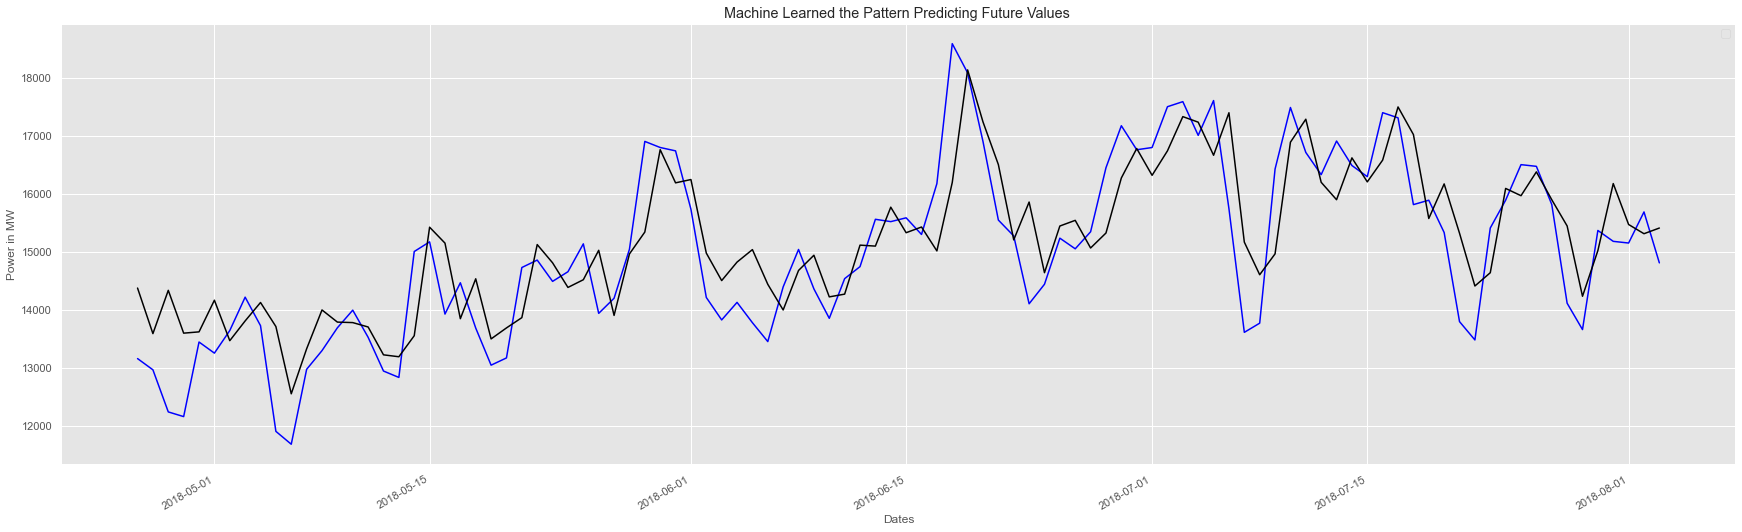

In [80]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = Actual_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="blue")
plt.plot(x,y1, color="black")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()